# MoMA Visualization Examples

Data source:
https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv

In [1]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import random
from pprint import pprint
%matplotlib inline

In [2]:
## Loading CSV as list of lists

metadata_table = []

with open('MoMA_Artworks.csv') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        metadata_table.append(row)
        
## Save first row to 'column_headers' variable,
# then view column headers next to their index values

column_headers = metadata_table[0]

pprint(list(enumerate(column_headers)))

## Remove column header row

metadata_table = metadata_table[1:]

[(0, '\ufeffTitle'),
 (1, 'Artist'),
 (2, 'ConstituentID'),
 (3, 'ArtistBio'),
 (4, 'Nationality'),
 (5, 'BeginDate'),
 (6, 'EndDate'),
 (7, 'Gender'),
 (8, 'Date'),
 (9, 'Medium'),
 (10, 'Dimensions'),
 (11, 'CreditLine'),
 (12, 'AccessionNumber'),
 (13, 'Classification'),
 (14, 'Department'),
 (15, 'DateAcquired'),
 (16, 'Cataloged'),
 (17, 'ObjectID'),
 (18, 'URL'),
 (19, 'ThumbnailURL'),
 (20, 'Circumference (cm)'),
 (21, 'Depth (cm)'),
 (22, 'Diameter (cm)'),
 (23, 'Height (cm)'),
 (24, 'Length (cm)'),
 (25, 'Weight (kg)'),
 (26, 'Width (cm)'),
 (27, 'Seat Height (cm)'),
 (28, 'Duration (sec.)')]


In [3]:
# View a random metadata record

random.choice(metadata_table)

['Plate (folio 12) from HORS DE LA COLLINE',
 'Henri Michaux',
 '3963',
 '(French, born Belgium. 1899–1984)',
 '(French)',
 '(1899)',
 '(1984)',
 '(Male)',
 '1983',
 'Lithograph, printed in black',
 'irreg. composition  10 1/8 x 7 7/8" (25.7 x 20 cm)',
 '',
 '256.1984.5',
 'Illustrated Book',
 'Drawings & Prints',
 '1984-10-02',
 'N',
 '14337',
 '',
 '',
 '',
 '',
 '',
 '25.7',
 '',
 '',
 '20.0',
 '',
 '']

In [4]:
## View a random 'height' value

import random

row = random.choice(metadata_table)
height = row[23]
print(height)

28.2575565151


# *Histograms: Painting Height & Width*

In [5]:
## Creating a list of 'height' values converted to floats, ignoring any missing or faulty values

height_list = []

for row in metadata_table:
    try:
        height = float(row[23])        # Converting height value (at index 23) to float and assigning it to 'height' variable
        height_list.append(height)     # Adding value to 'height_list'
    except:
        pass                           # If we get an error in the 'try' block above, we do nothing and move to the next row.
                                       # This happens when the 'height' field is empty, so it can't be converted to float.

height_list[:10]      # Viewing first 10 height values

[48.6, 40.6401, 34.3, 50.8, 38.4, 35.6, 35.6, 35.6, 35.6, 35.6]

In [6]:
## Creating a list of 'width' values converted to floats, ignoring any missing or faulty values

width_list = []

for row in metadata_table:
    try:
        width = float(row[26])
        width_list.append(width)
    except:
        pass


width_list[:10]

[168.9, 29.8451, 31.8, 50.8, 19.1, 45.7, 45.7, 45.7, 45.7, 45.7]

In [7]:
## Comparing number of records in original metadata with extracted height and width lists

print(len(metadata_table))
print(len(width_list))
print(len(height_list))

# Note that extracted lists are shorter than full metadata table, because we skipped missing values.

140848
122946
123867


In [8]:
## Finding average width (for artworks that include that field)

np.mean(width_list)

37.81914068877904

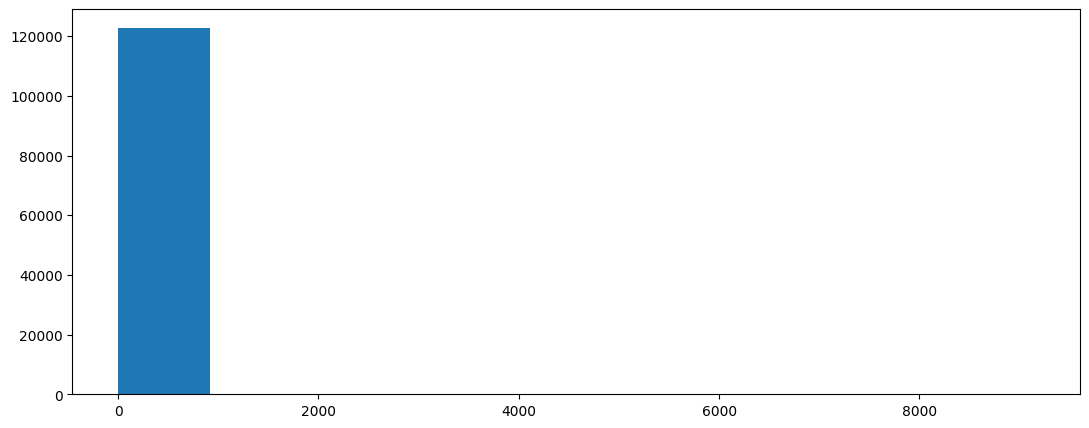

In [9]:
## Creating a basic histogram

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13,5))
plt.hist(width_list)
plt.show()

# This isn't very useful. Note that the x axis (i.e., width values) extends to 8000 cm, 
# meaning everything else is squeezed into one histogram bar.

In [10]:
## Viewing the biggest width values

sorted(width_list)[::-1][:30]

[9144.0,
 6423.7,
 6400.8,
 5435.6,
 4663.4493,
 4572.0091440183,
 4094.4882,
 2621.3,
 2164.0800000087,
 2032.0041,
 1993.9,
 1737.3635,
 1705.6,
 1700.2,
 1645.9232918466,
 1584.9632,
 1531.6231,
 1524.0,
 1524.0,
 1499.2,
 1262.382524765,
 1240.0,
 1226.8224536449,
 1219.2024,
 1218.0,
 1200.0,
 1200.0,
 1188.7,
 1158.2423164846,
 1158.2423164846]

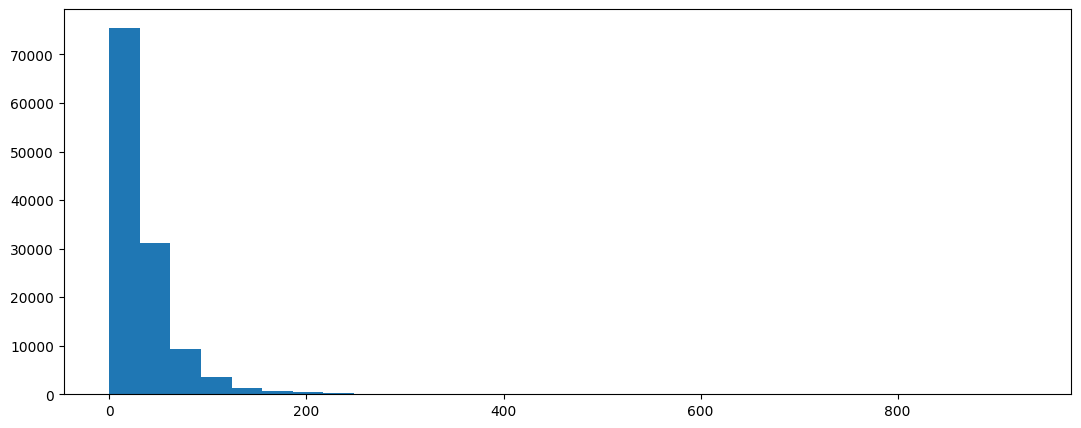

In [11]:
## Let's omit all width values above 1000 cm and break up the plot into 30 bins

plt.figure(figsize=(13,5))

temp_width_list = [item for item in width_list if item<=1000]

plt.hist(temp_width_list, bins=30)

plt.show()

# Getting closer ...

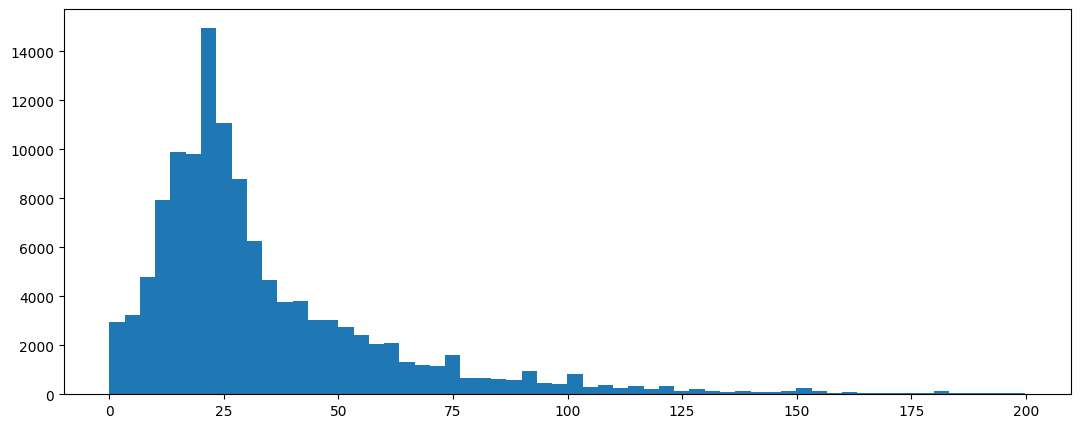

In [12]:
## Omitting values above 200 cm and doubling the number of bins to 60

plt.figure(figsize=(13,5))

temp_width_list = [item for item in width_list if item<200]

plt.hist(temp_width_list, bins=60)

plt.show()

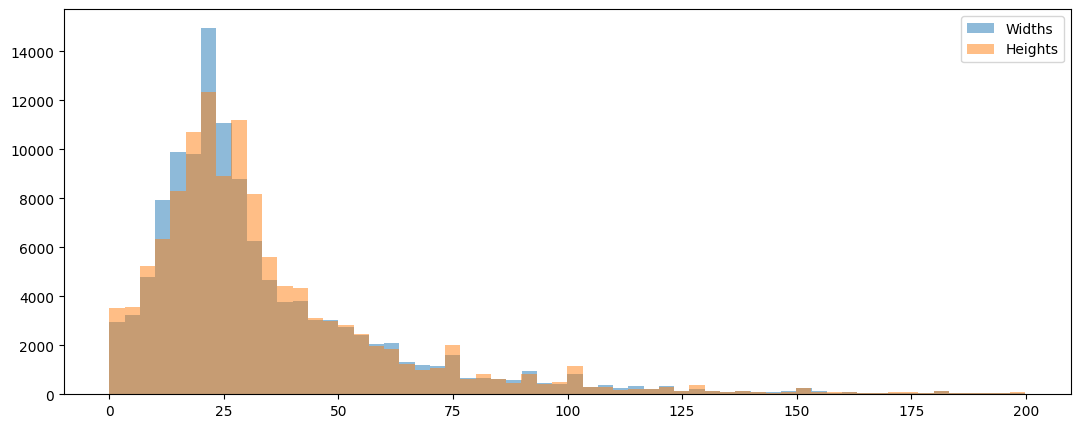

In [13]:
## Plotting two overlaid histograms

plt.figure(figsize=(13,5))

temp_width_list = [item for item in width_list if item<200]
temp_height_list = [item for item in height_list if item<200]

plt.hist(temp_width_list, alpha=0.5, label='Widths', bins=60)
plt.hist(temp_height_list, alpha=0.5, label='Heights', bins=60)

plt.legend(loc='upper right')

plt.show()

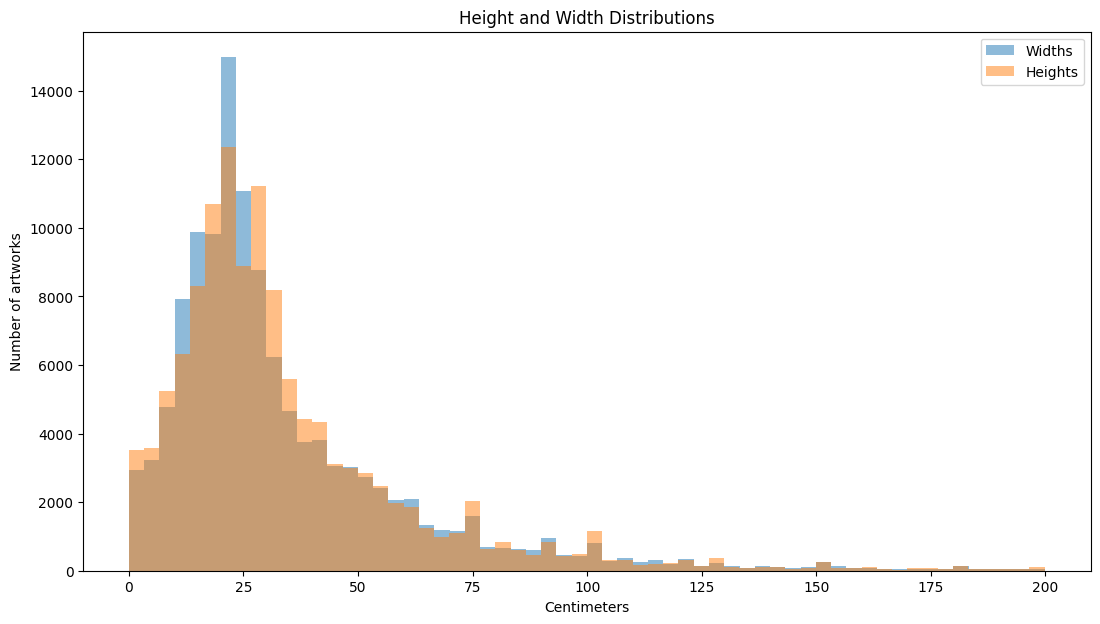

In [14]:
## Plotting two overlaid histograms with labels

plt.figure(figsize=(13,7))

temp_width_list = [item for item in width_list if item<200]
temp_height_list = [item for item in height_list if item<200]

plt.hist(temp_width_list, alpha=0.5, label='Widths', bins=60)
plt.hist(temp_height_list, alpha=0.5, label='Heights', bins=60)

plt.legend(loc='upper right')

plt.title('Height and Width Distributions')
plt.xlabel('Centimeters')
plt.ylabel('Number of artworks')

plt.show()

# *Scatter Plots: Height and Width Pairs*

In [15]:
## Creating a list of [height, width] coordinate pairs for each record with valid height and width values

height_width_pairs = []

for row in metadata_table:
    try:
        height = float(row[23])
        width = float(row[26])
        pair = [height, width]
        height_width_pairs.append(pair)
    except:
        pass

height_width_pairs[:10]           # Viewing first 10 [height, width] pairs

[[48.6, 168.9],
 [40.6401, 29.8451],
 [34.3, 31.8],
 [50.8, 50.8],
 [38.4, 19.1],
 [35.6, 45.7],
 [35.6, 45.7],
 [35.6, 45.7],
 [35.6, 45.7],
 [35.6, 45.7]]

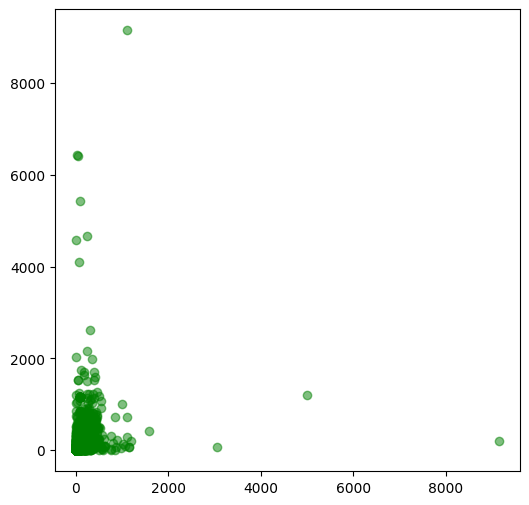

In [16]:
## Creating basic scatter plot

import matplotlib.pyplot as plt
%matplotlib inline

x_list = [item[0] for item in height_width_pairs]  # Creating a list of x values (index 0 in each pair)
y_list = [item[1] for item in height_width_pairs]  # Creating a list of y values (index 1 in each pair)

plt.figure(figsize=(6,6))

plt.scatter(x_list, y_list, c='green', alpha=0.5)

plt.show()

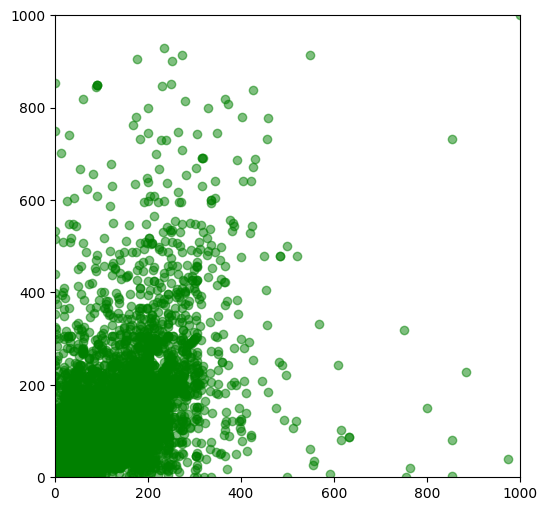

In [17]:
## Narrowing visible plot to x and y values under 1000 cm

x_list = [item[0] for item in height_width_pairs]  # Creating a list of x values (index 0 in each pair)
y_list = [item[1] for item in height_width_pairs]  # Creating a list of x values (index 1 in each pair)

plt.figure(figsize=(6,6))

plt.scatter(x_list, y_list, c='green', alpha=0.5)

plt.ylim(ymin=0, ymax=1000)
plt.xlim(xmin=0, xmax=1000)

plt.show()

# Getting closer, but still a bit indistinct. Let's zoom in further.

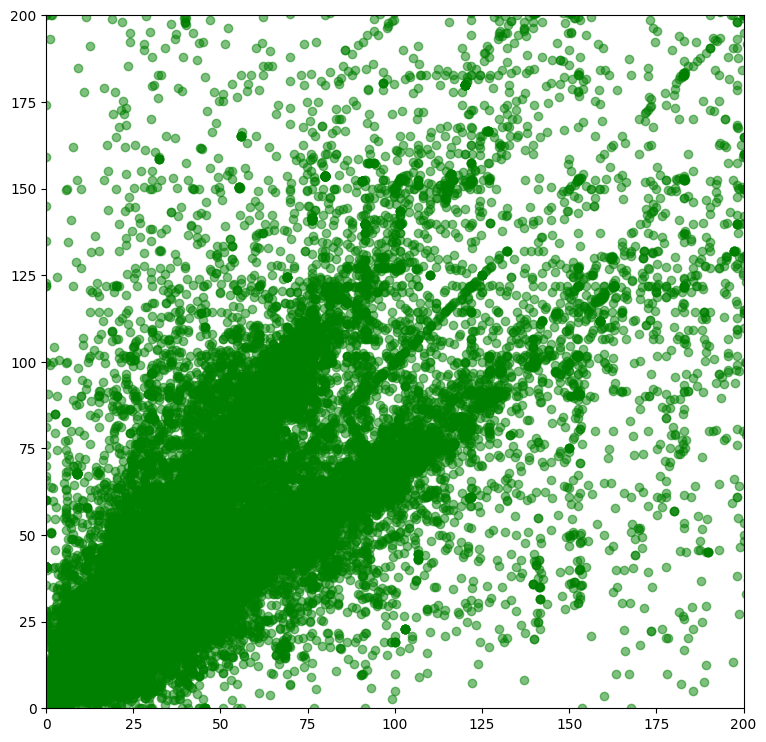

In [18]:
## Narrowing visible plot to x and y values under 200 cm and increasing plot size

x_list = [item[0] for item in height_width_pairs]  # Creating a list of x values (index 0 in each pair)
y_list = [item[1] for item in height_width_pairs]  # Creating a list of x values (index 1 in each pair)

plt.figure(figsize=(9,9))                          ## <-- Larger plot size

plt.scatter(x_list, y_list, c='green', alpha=0.5)

plt.ylim(ymin=0, ymax=200)                         ## <-- ymax=200
plt.xlim(xmin=0, xmax=200)                         ## <-- xmax=200

plt.show()

# *Pie Chart: Nationality*

In [19]:
## Creating a list of all items in the 'Nationality' field

nationality_list = []

for row in metadata_table:
    nationality_list.append(row[4])

nationality_list[:10]                  # Viewing first 10 items in nationality_list

['(Austrian)',
 '(French)',
 '(Austrian)',
 '()',
 '(Austrian)',
 '()',
 '()',
 '()',
 '()',
 '()']

In [20]:
## Viewing a few more

print(nationality_list[90])
print(nationality_list[8])
print(nationality_list[3329])
print(nationality_list[703])

(Swedish)
()
(Finnish)
(American)


In [21]:
## Stripping parentheses from the beginning and end of each item in 'nationality_list'

nationality_list_cleaned = [item.replace('() ', '').strip('()') for item in nationality_list]

nationality_list_cleaned[10000:10010]

# Note that some fields include multiple entries, so we're not done. Let's try again:

['Russian',
 '',
 'German) (American) (British) ',
 '',
 'Russian) (Russian',
 'American',
 'American',
 'American',
 'American',
 'American']

In [22]:
## Splitting each item at ')' and discarding everything that follows.
# We're also using .replace() to remove empty '()' entries when they appear first in a list of nationalities.
# We're extracting the first nationality listed and discarding the rest, which may distort the data.

nationality_list_cleaned = [item.replace('() ', '').split(')')[0].strip('()') for item in nationality_list]

nationality_list_cleaned[10000:10010]

['Russian',
 '',
 'German',
 '',
 'Russian',
 'American',
 'American',
 'American',
 'American',
 'American']

In [23]:
### Pie chart with manual labels:

## Looping through list of nationalities, keeping a tally of how many times various values appear

american_tally = 0
french_tally = 0
british_tally = 0
missing_tally = 0
other_tally = 0


for item in nationality_list_cleaned:
    if item == 'American':
        american_tally += 1
    elif item == 'French':
        french_tally += 1
    elif item == 'British':
        british_tally += 1
    elif item == '':
        missing_tally += 1
    else:
        other_tally +=1

[61900, 23134, 6191, 6363, 43260]
['American', 'French', 'British', 'Missing nationality', 'Other']


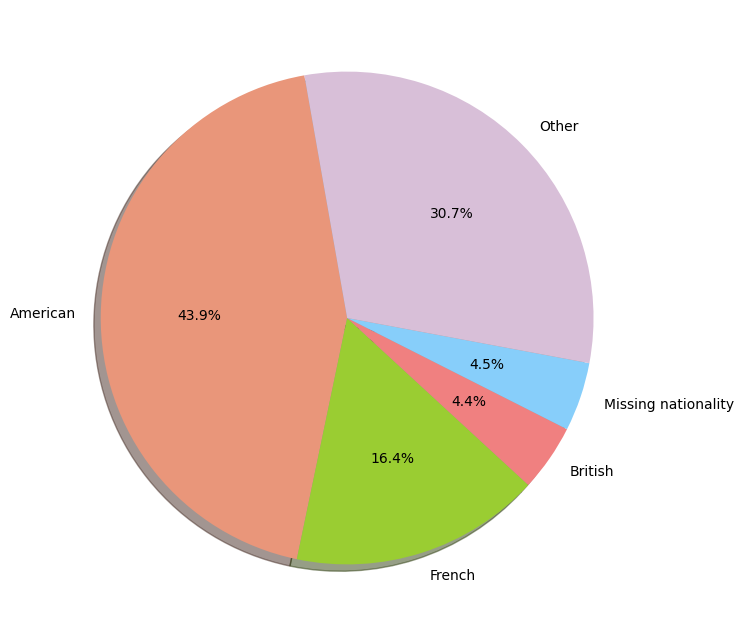

In [24]:
### Pie chart with manual labels:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))

## A list of numbers, each representing the size of a different category
size_list = [american_tally, french_tally, british_tally, missing_tally, other_tally] 
print(size_list)

## A list of labels corresponding in order with the size list above
label_list = ['American', 'French', 'British', 'Missing nationality', 'Other']
print(label_list)

## Colors corresponding in order with the lists above
# List of color names: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
color_list = ['darksalmon', 'yellowgreen', 'lightcoral', 'lightskyblue', 'thistle']

# Plot
plt.pie(size_list, labels=label_list, colors=color_list, autopct='%1.1f%%', shadow=True, startangle=100) 

plt.show()

In [25]:
### Pie chart with automatic labels:

## Creating a list of nationalities by how many times they appear in 'nationality_list', sorted in descending order

from operator import itemgetter
import collections

counter = collections.Counter(nationality_list_cleaned)

nationality_count_pairs = sorted(counter.most_common(), key=itemgetter(1,0), reverse=True)

nationality_count_pairs[:10]

[('American', 61900),
 ('French', 23134),
 ('German', 10003),
 ('', 6363),
 ('British', 6191),
 ('Spanish', 3169),
 ('Italian', 3065),
 ('Japanese', 2705),
 ('Russian', 2592),
 ('Swiss', 2354)]

In [26]:
## Creating separate, corresponding lists for nationality values and how many times they appear in MoMA's collection

nationality_descending = [item[0] for item in nationality_count_pairs]
count_descending = [item[1] for item in nationality_count_pairs]

print(nationality_descending[:10])
print(count_descending[:10])

['American', 'French', 'German', '', 'British', 'Spanish', 'Italian', 'Japanese', 'Russian', 'Swiss']
[61900, 23134, 10003, 6363, 6191, 3169, 3065, 2705, 2592, 2354]


[61900, 23134, 10003, 6363, 6191, 3169, 3065, 2705, 2592, 2354, 1746, 1493, 1355, 1201, 1084, 1014, 915, 869, 773, 766, 621, 567, 535, 518, 483, 469, 414, 361, 329, 270, 260, 229, 229, 216, 202, 188, 160, 154, 126, 120, 105, 93, 74, 74, 73, 70, 65, 64, 62, 59, 57, 54, 54, 50, 49, 47, 45, 43, 43, 40, 26, 26, 23, 23, 22, 22, 22, 21, 19, 19, 19, 16, 15, 14, 13, 13, 12, 12, 12, 10, 10, 9, 8, 7, 7, 6, 6, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]
['American', 'French', 'German', '', 'British', 'Spanish', 'Italian', 'Japanese', 'Russian', 'Swiss', 'Dutch', 'Belgian', 'Mexican', 'Nationality unknown', 'Argentine', 'Austrian', 'Canadian', 'Brazilian', 'Czech', 'Colombian', 'Chilean', 'Polish', 'Danish', 'Venezuelan', 'Ivorian', 'Chinese', 'South African', 'Israeli', 'Swedish', 'Croatian', 'Australian', 'Indian', 'Finnish', 'Cuban', 'Serbian', 'Norwegian', 'Hungarian', 'Portuguese', 'Ukrainian', 'Peruvian', 'Uruguayan', 'Korean', 'Latvian', 'Egypti

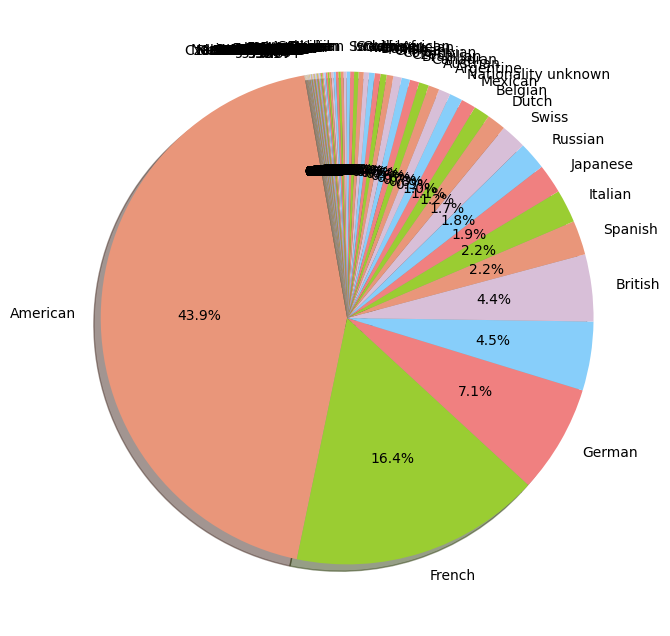

In [27]:
### Pie chart with automatic labels:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,8))

## A list of numbers, each representing the size of a different category
size_list = count_descending
print(size_list)

## A list of labels corresponding in order with the size list above
label_list = nationality_descending
print(label_list)

## Colors corresponding in order with the lists above, repeating
# List of color names: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
color_list = ['darksalmon', 'yellowgreen', 'lightcoral', 'lightskyblue', 'thistle']

# Plot
plt.pie(size_list, labels=label_list, colors=color_list, autopct='%1.1f%%', shadow=True, startangle=100)

plt.show()

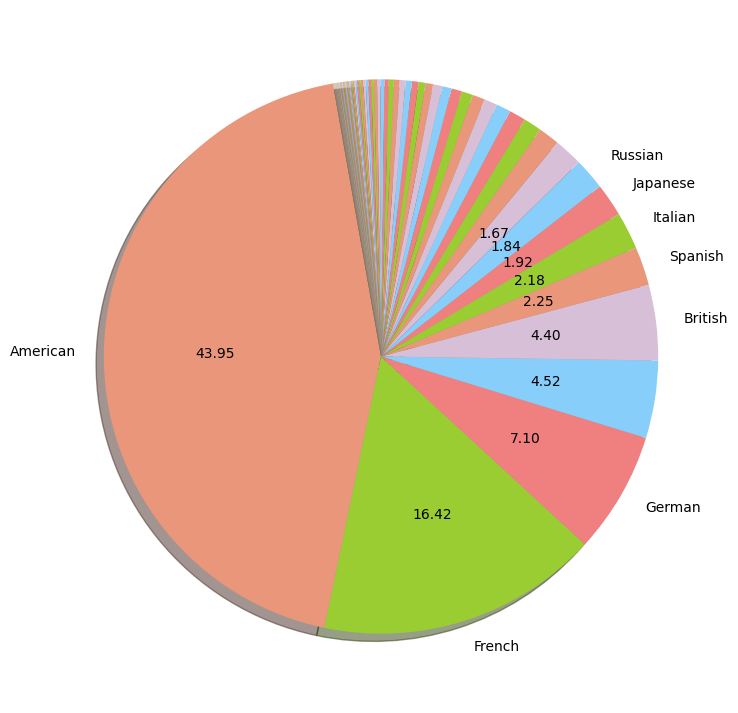

In [28]:
### Pie chart with automatic labels:

# Hiding labels for small values to make pie chart more readable

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9,9))


## A list of numbers, each representing the size of a different category
size_list = count_descending

## A list of labels corresponding in order with the size list above
label_list = nationality_descending[:9] + ['']*(len(nationality_descending) - 9)  ## Keeping the first 10 nationality labels  
                                                                                  ## and setting the rest to empty strings
## Colors corresponding in order with the lists above, repeating
# List of color names: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
color_list = ['darksalmon', 'yellowgreen', 'lightcoral', 'lightskyblue', 'thistle']

def my_autopct(pct):                                              ## Defining a function we'll point to in plt.pie() that
    return ('%.2f' % pct) if pct > 1.5 else ""                    ## returns "" (empty string) for percentages below 1.5

# Plot
plt.pie(size_list, labels=label_list, colors=color_list, autopct=my_autopct, shadow=True, startangle=100)

plt.show()